In [234]:
# Librerias 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [235]:
# Leer archivo

bankT = pd.read_csv('bank_transactions.csv')

In [236]:
# Head

bankT.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [237]:
# Drop de valores null
bankT = bankT.dropna()

# Verificar que ya no hay valores null
if not bankT.isnull().values.any():
    print("Valores nulos:", bankT.isnull().values.any())

Valores nulos: False


In [238]:
# Drop de valores duplicados
bankT = bankT.drop_duplicates()

if not bankT.duplicated().values.any():
    print("Valores duplicados:", bankT.duplicated().values.any())

Valores duplicados: False


In [239]:
# Pasar a numerico

bankT['CustGender'] = bankT['CustGender'].replace(['M','F'],[0,1])
bankT = bankT[bankT['CustGender'] != 'T']

In [240]:
# Eliminar customerID

bankT = bankT.drop(['CustomerID'], axis=1)

In [241]:
# Elminar TransactionID

bankT = bankT.drop(['TransactionID'], axis=1)

In [252]:
# Convert TransactionDate to datetime format
bankT['TransactionDate'] = pd.to_datetime(bankT['TransactionDate'])
bankT['TransactionYear'] = bankT['TransactionDate'].dt.year
bankT = bankT.drop(['TransactionDate'], axis=1)

In [243]:
# Pasar fecha año de nacimiento a valor numerico
bankT['BirthYear'] = pd.to_numeric(bankT['CustomerDOB'].str[-2:], errors='coerce')
bankT['BirthYear'] += 1900

bankT = bankT.drop(['CustomerDOB'], axis=1)

In [244]:
bankT = bankT.drop(['CustLocation'], axis=1)

In [258]:
# Escalar datos
from sklearn.preprocessing import StandardScaler, normalize

Escalador = StandardScaler()
Escalar = Escalador.fit_transform(bankT)
Normalizado = normalize(Escalar)
bankT = pd.DataFrame(Normalizado, columns=bankT.columns) 

In [259]:
bankT.head()

,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),TransactionYear,BirthYear
0,0.909976,-0.063420,-0.150001,-0.129790,0.0,0.358575
1,-0.143454,-0.031448,-0.070338,0.951649,0.0,-0.260479
2,0.895007,-0.062342,-0.152781,-0.091704,0.0,0.404135
3,0.855716,0.461196,-0.146054,0.039119,0.0,-0.179406
4,0.938023,-0.072845,0.267063,0.017054,0.0,0.207830


<AxesSubplot:xlabel='CustGender', ylabel='count'>

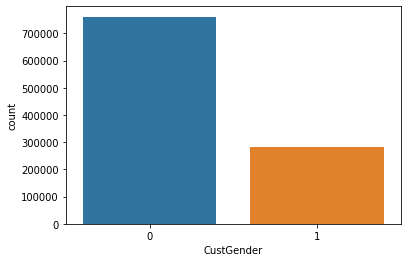

In [246]:

# Grafico de barras
sns.countplot(x='CustGender', data=bankT)

<AxesSubplot:>

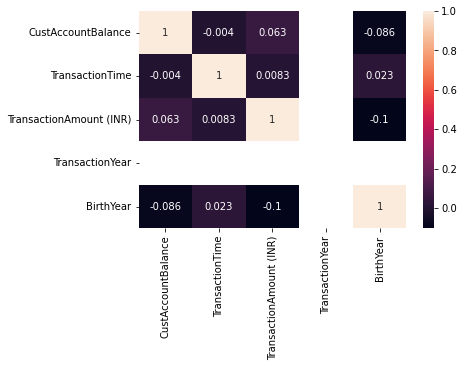

In [247]:
# Grafico exploratorio
sns.heatmap(bankT.corr(), annot=True)

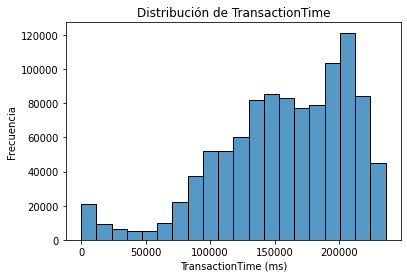

In [248]:
sns.histplot(data=bankT, x="TransactionTime", bins=20)
plt.xlabel("TransactionTime (ms)")
plt.ylabel("Frecuencia")
plt.title("Distribución de TransactionTime")
plt.show()

<AxesSubplot:xlabel='CustAccountBalance', ylabel='TransactionAmount (INR)'>

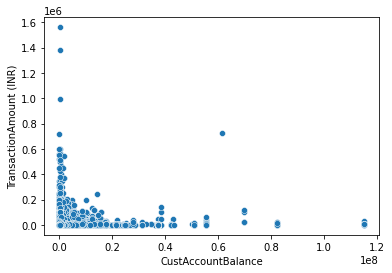

In [249]:
# Gráfico exploratorio para ver relación entre balance monetario y valor de transacciones
sns.scatterplot(data=bankT, x="CustAccountBalance", y="TransactionAmount (INR)")

#### 1.2 Implementación con librería

In [250]:
# Librerías
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


In [260]:
PCALibreria = PCA(n_components=2)
X = PCALibreria.fit_transform(bankT)
X = pd.DataFrame(X)
X.columns = ['PC1', 'PC2']

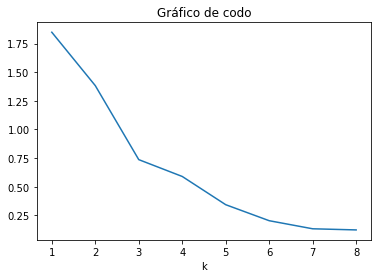

In [261]:
def NLLFunc(X, kmax=10):
    nll = [-GaussianMixture(n_components=k).fit(X).score(X) for k in range(1, kmax+1)]
    return nll
nll = NLLFunc(X, kmax=8)

sns.lineplot(x=range(1, 9), y=nll)
plt.xlabel("k")
plt.title("Gráfico de codo")
plt.show()

In [262]:
GaussianMixture(n_components=4).fit(X).score(X)

-0.45049747178500527

In [263]:
# Métrica de desempeño
print("Log likelihood:", -GaussianMixture(n_components=4).fit(X).score(X))

Log likelihood: 0.4543412745485242
